# <font color="#3cc4f0">4. Proje: Sağlık Bilgileri</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",100)
import scipy
import math
import plotly.express as px
import statsmodels.api as sm

In [2]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api= KaggleApi()
api.authenticate()

In [4]:
api.dataset_download_file("kukuroo3/body-signal-of-smoking/data",
                          file_name="smoking.csv")

True

In [6]:
import zipfile

# Sıkıştırılmış dosyayı çıkartma
with zipfile.ZipFile("smoking.csv.zip", "r") as zip_ref:
    zip_ref.extractall()

# "train.csv" dosyasını DataFrame olarak okuma
df = pd.read_csv("smoking.csv")

## <font color="#3cc4f0">Veri Analizi ve Düzenleme: </font>

In [7]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Tabloya bakıldığında, her bir satırın bir kişiye ait sağlık ve demografik bilgileri temsil ettiği görülmektedir. İşte bu tabloyu daha ayrıntılı bir şekilde açıklamak için her sütunun anlamı:

- `ID`: Her bir kişinin benzersiz kimlik numarasıdır. Bu sayede her kişiyi ayırt etmek için kullanılabilir.

- `gender`: Kişinin cinsiyetini ifade eder. "F" kadınları, "M" ise erkekleri temsil eder.

- `age`: Kişinin yaşını gösterir. Bu, yaşın sağlık üzerinde önemli bir faktör olduğu birçok analizde kullanılabilir.

- `height(cm)`: Kişinin boyunu santimetre cinsinden ifade eder. Boy, kilo ve vücut kitle indeksi gibi sağlık ölçümlerinin hesaplanmasında kullanılabilir.

- `weight(kg)`: Kişinin kilosunu kilogram cinsinden ifade eder. Bu, obezite ve kilo kontrolü ile ilgili analizler için önemlidir.

- `waist(cm)`: Kişinin bel çevresini santimetre cinsinden ifade eder. Bel çevresi, obezite ve kardiometabolik risk faktörleri için bir gösterge olabilir.

- `eyesight(left)`: Sol gözün görme yeteneği ile ilgili veriyi içerir. Bu veri göz sağlığı analizleri için kullanılabilir.

- `eyesight(right)`: Sağ gözün görme yeteneği ile ilgili veriyi içerir. Sol göz verisi ile karşılaştırarak göz sağlığı analizleri yapılabilir.

- `hearing(left)`: Sol kulak işitme yeteneği ile ilgili veriyi içerir. İşitme sağlığına yönelik analizler için kullanılabilir.

- `hearing(right)`: Sağ kulak işitme yeteneği ile ilgili veriyi içerir. Sol kulak verisi ile karşılaştırarak işitme sağlığı analizleri yapılabilir.

- `systolic`: Kişinin sistolik kan basıncını ifade eder. Kan basıncı sağlık analizleri için önemli bir gösterge olabilir.

- `relaxation`: Kişinin dinlenme kan basıncını ifade eder. Kan basıncı ölçümleri sağlık izlemesinde önemlidir.

- `fasting blood sugar`: Açlık kan şekeri seviyesini içerir. Bu, şeker metabolizması ve diyabet analizleri için kullanılabilir.

- `Cholesterol`: Kolesterol seviyesini ifade eder. Kolesterol seviyeleri kalp sağlığı analizlerinde önemli bir faktördür.

- `triglyceride`: Trigliserid seviyesini içerir. Bu, lipid profili analizlerinde kullanılabilir.

- `HDL`: Yüksek Yoğunluklu Lipoprotein (HDL) seviyesini ifade eder. HDL seviyeleri kalp sağlığı için önemlidir.

- `LDL`: Düşük Yoğunluklu Lipoprotein (LDL) seviyesini içerir. LDL seviyeleri kalp sağlığı analizlerinde kullanılabilir.

- `hemoglobin`: Hemoglobin seviyesini ifade eder. Hemoglobin seviyeleri kan sağlığı ve anemi analizleri için kullanılabilir.

- `Urine protein`: İdrar protein seviyesini içerir. İdrar analizleri böbrek sağlığı için önemlidir.

- `serum creatinine`: Serum kreatinin seviyesini içerir. Bu, böbrek fonksiyonunu değerlendirmek için kullanılabilir.

- `AST`: Aspartat Aminotransferaz (AST) seviyesini içerir. AST seviyeleri karaciğer sağlığı analizlerinde kullanılabilir.

- `ALT`: Alanin Aminotransferaz (ALT) seviyesini ifade eder. ALT seviyeleri karaciğer sağlığı için önemlidir.

- `Gtp`: Gama Glutamil Transferaz (GGT) seviyesini içerir. GGT seviyeleri karaciğer ve safra yolu sağlığı analizlerinde kullanılabilir.

- `oral`: Ağız sağlığı ile ilgili bilgiyi içerir. "Y" ağız sağlığına sahip kişileri, "N" ise olmayanları temsil eder.

- `dental caries`: Diş çürüğü durumunu içerir. Diş sağlığı analizleri için kullanılabilir.

- `tartar`: Diş taşı birikimi durumunu ifade eder. Diş sağlığı ve ağız hijyeni analizlerinde önemlidir.

- `smoking`: Sigara içme durumunu ifade eder. "Y" içenleri, "N" içmeyenleri temsil eder.

In [9]:
df.shape

(55692, 27)

In [11]:
# Sütunları 1 ve 0 olarak değiştirme
df['oral'] = df['oral'].replace({'Y': 1, 'N': 0})
df['tartar'] = df['tartar'].replace({'Y': 1, 'N': 0})

# Sütunları int veri türüne dönüştürme
df['oral'] = df['oral'].astype(int)
df['tartar'] = df['tartar'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int32  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [16]:
df["gender"].value_counts()

M    35401
F    20291
Name: gender, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(df["gender"])
df["gender"] = le.fit_transform(df["gender"])

In [17]:
df.corr()['smoking'].sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.400678
height(cm)             0.396675
weight(kg)             0.302780
triglyceride           0.251799
Gtp                    0.236619
waist(cm)              0.226259
serum creatinine       0.216812
relaxation             0.108309
dental caries          0.103857
fasting blood sugar    0.100279
tartar                 0.098655
ALT                    0.097338
systolic               0.073109
eyesight(right)        0.063017
eyesight(left)         0.061204
AST                    0.059253
Urine protein          0.014267
ID                     0.011476
hearing(right)        -0.018855
hearing(left)         -0.023209
Cholesterol           -0.028548
LDL                   -0.045220
age                   -0.162557
HDL                   -0.178470
oral                        NaN
Name: smoking, dtype: float64

In [41]:
df["oral"].value_counts()

1    55692
Name: oral, dtype: int64

In [19]:
df.drop(columns=["ID"], inplace=True)

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,55692.0,0.635657,0.481250,0.0,0.0,1.0,1.0,1.0
age,55692.0,44.182917,12.071418,20.0,40.0,40.0,55.0,85.0
height(cm),55692.0,164.649321,9.194597,130.0,160.0,165.0,170.0,190.0
weight(kg),55692.0,65.864936,12.820306,30.0,55.0,65.0,75.0,135.0
waist(cm),55692.0,82.046418,9.274223,51.0,76.0,82.0,88.0,129.0
eyesight(left),55692.0,1.012623,0.486873,0.1,0.8,1.0,1.2,9.9
eyesight(right),55692.0,1.007443,0.485964,0.1,0.8,1.0,1.2,9.9
hearing(left),55692.0,1.025587,0.157902,1.0,1.0,1.0,1.0,2.0
hearing(right),55692.0,1.026144,0.159564,1.0,1.0,1.0,1.0,2.0
systolic,55692.0,121.494218,13.675989,71.0,112.0,120.0,130.0,240.0


## <font color="#3cc4f0">Veri Görselleştirme: </font>

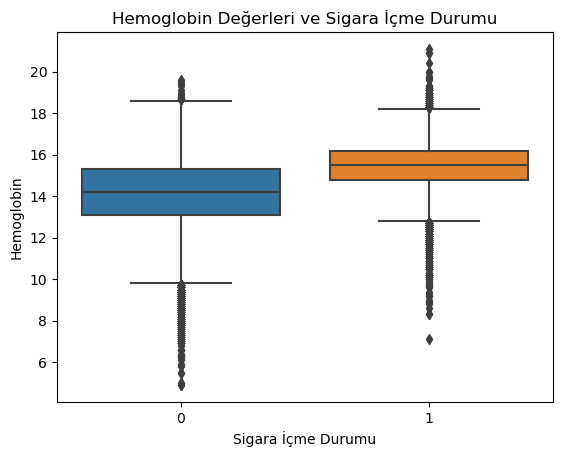

In [42]:
sns.boxplot(x='smoking', y='hemoglobin', data=df)
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Hemoglobin')
plt.title('Hemoglobin Değerleri ve Sigara İçme Durumu')
plt.show()

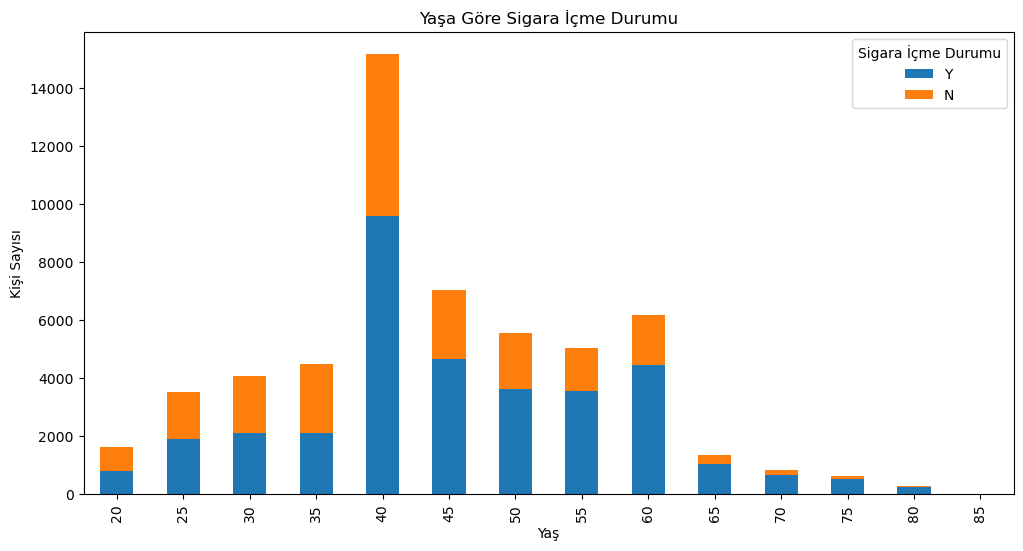

In [36]:
# Yaşa göre sigara içme durumunu gruplayın
age_smoking = df.groupby(['age', 'smoking']).size().unstack()

# Çubuk grafik çizin
age_smoking.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Yaş')
plt.ylabel('Kişi Sayısı')
plt.title('Yaşa Göre Sigara İçme Durumu')
plt.legend(title='Sigara İçme Durumu', labels=['Y', 'N'])
plt.show()

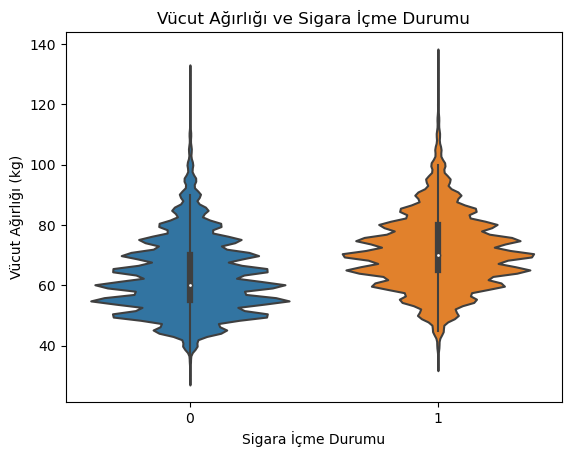

In [45]:
sns.violinplot(x='smoking', y='weight(kg)', data=df)
plt.xlabel('Sigara İçme Durumu')
plt.ylabel('Vücut Ağırlığı (kg)')
plt.title('Vücut Ağırlığı ve Sigara İçme Durumu')
plt.show()

<Axes: ylabel='gender'>

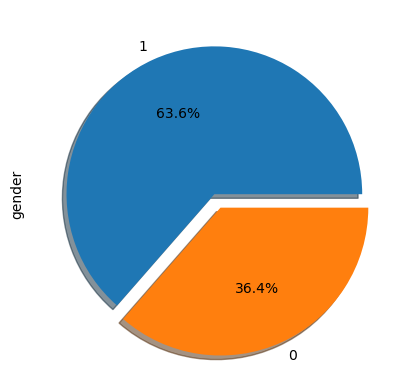

In [46]:
df['gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=True)

<Axes: xlabel='gender,smoking'>

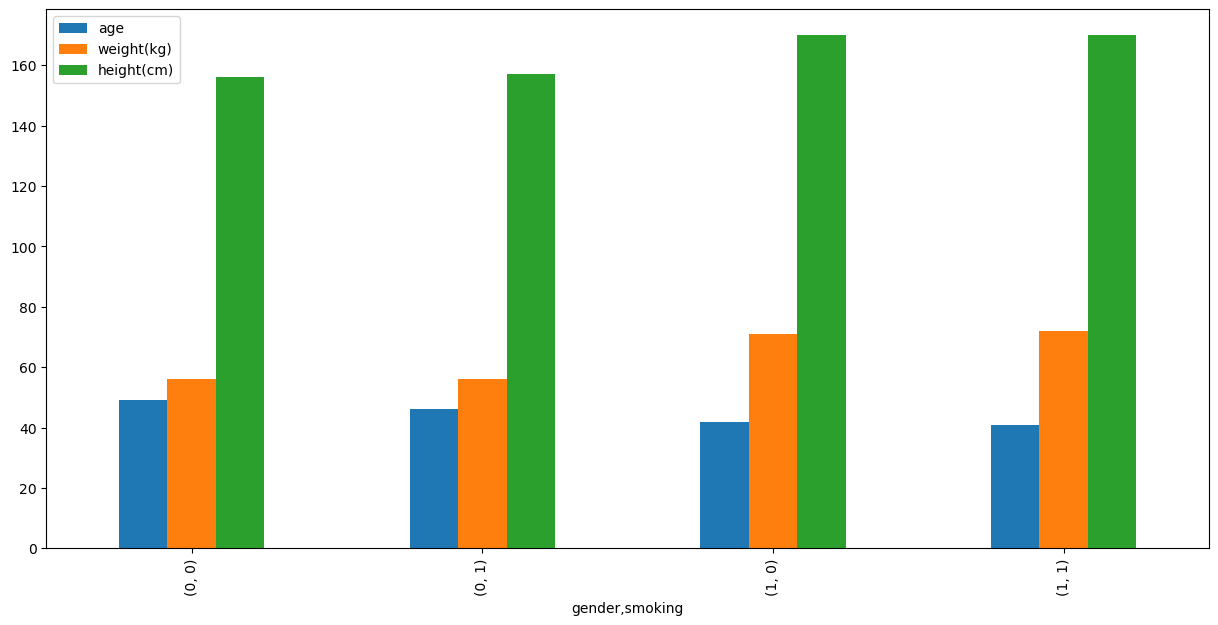

In [47]:
summary=df.groupby(["gender","smoking"])["age","weight(kg)","height(cm)"].mean().round(0)
summary.plot(kind="bar",figsize=(15,7))

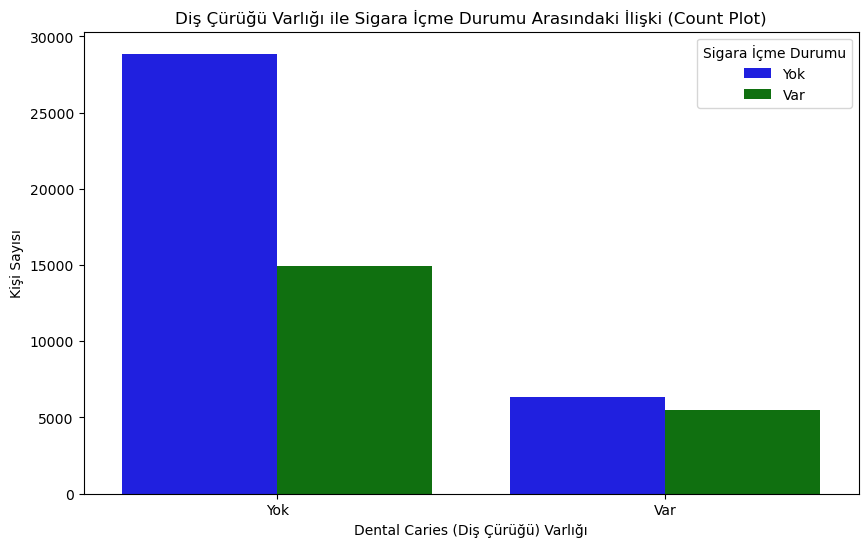

In [53]:
# Count Plot (sayım grafiği) oluşturun
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dental caries', hue='smoking', palette={0: 'blue', 1: 'green'})
plt.xlabel('Dental Caries (Diş Çürüğü) Varlığı')
plt.ylabel('Kişi Sayısı')
plt.title('Diş Çürüğü Varlığı ile Sigara İçme Durumu Arasındaki İlişki (Count Plot)')
plt.xticks([0, 1], ['Yok', 'Var'])
plt.legend(title='Sigara İçme Durumu', labels=['Yok', 'Var'])
plt.show()

## <font color="#3cc4f0">Modelleme ve Deep Learning: </font>

In [55]:
# Classification (Sigara kullanıyor mu, Kullanmıyor mu?)

In [56]:
x = df.drop(columns=["smoking"])
y = df["smoking"]

In [57]:
def fnc_all_classification_models(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier 
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
   
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [58]:
fnc_all_classification_models(x,y)

,accuracy_score
RandomForestClassifier,0.829697
DecisionTreeClassifier,0.777449
XGBClassifier,0.775563
SVC,0.723584
BernoulliNB,0.707694
LogisticRegression,0.707155
KNeighborsClassifier,0.705629
GaussianNB,0.704731


In [59]:
# Deep Learning:
from tensorflow.keras.models import Sequential #arka arkaya dizi şeklinde ekleme kısmı
from tensorflow.keras.layers import Dense

In [60]:
model=Sequential()
model.add(Dense(8,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [61]:
model.fit(x,y,epochs=30,batch_size=10,verbose=1)

Epoch 1/30
5570/5570 [==============================] - 10s 1ms/step - loss: 0.5630 - accuracy: 0.6949
Epoch 2/30
5570/5570 [==============================] - 8s 1ms/step - loss: 0.5274 - accuracy: 0.7148
Epoch 3/30
5570/5570 [==============================] - 8s 1ms/step - loss: 0.5078 - accuracy: 0.7228
Epoch 4/30
5570/5570 [==============================] - 8s 1ms/step - loss: 0.4902 - accuracy: 0.7335
Epoch 5/30
5570/5570 [==============================] - 8s 1ms/step - loss: 0.4808 - accuracy: 0.7432
Epoch 6/30
5570/5570 [==============================] - 8s 2ms/step - loss: 0.4783 - accuracy: 0.7426
Epoch 7/30
5570/5570 [==============================] - 8s 1ms/step - loss: 0.4775 - accuracy: 0.7428
Epoch 8/30
5570/5570 [==============================] - 8s 1ms/step - loss: 0.4756 - accuracy: 0.7447
Epoch 9/30
5570/5570 [==============================] - 10s 2ms/step - loss: 0.4739 - accuracy: 0.7446
Epoch 10/30
5570/5570 [==============================] - 9s 2ms/step - loss: 0.4

In [62]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 208       
                                                                 
 dense_1 (Dense)             (None, 120)               1080      
                                                                 
 dense_2 (Dense)             (None, 60)                7260      
                                                                 
 dense_3 (Dense)             (None, 30)                1830      
                                                                 
 dense_4 (Dense)             (None, 10)                310       
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
 dense_6 (Dense)             (None, 1)                 5

In [63]:
model.evaluate(x,y)

1741/1741 [==============================] - 2s 1ms/step - loss: 0.4671 - accuracy: 0.7533


[0.4670770466327667, 0.753250002861023]

1741/1741 [==============================] - 2s 1ms/step


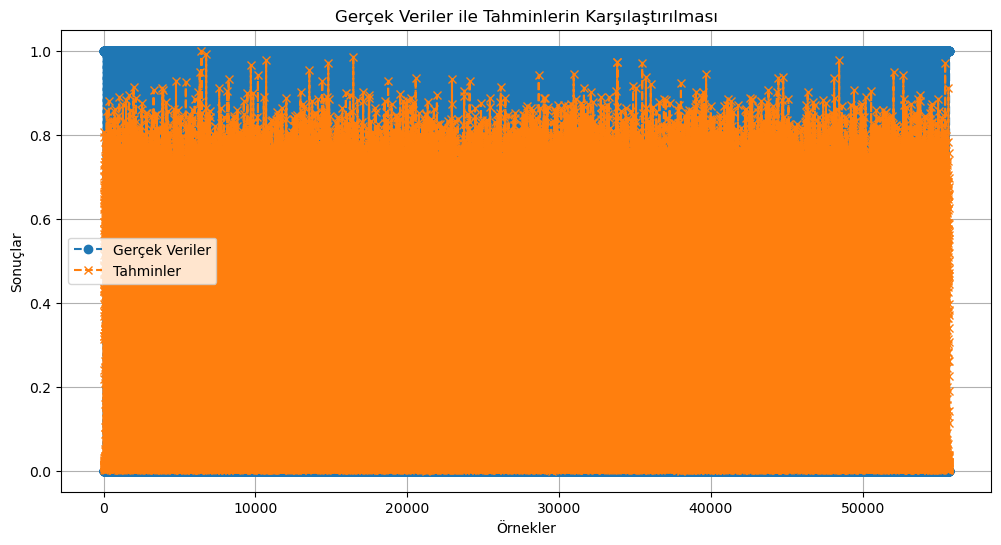

In [66]:
# Test verileri üzerinde tahminleri yapın
y_pred = model.predict(x)

# Tahminleri ve gerçek verileri karşılaştırmak için bir çizgi grafiği oluşturun
plt.figure(figsize=(12, 6))
plt.plot(range(len(y)), y, label='Gerçek Veriler', marker='o', linestyle='--')
plt.plot(range(len(y)), y_pred, label='Tahminler', marker='x', linestyle='--')
plt.xlabel('Örnekler')
plt.ylabel('Sonuçlar')
plt.title('Gerçek Veriler ile Tahminlerin Karşılaştırılması')
plt.legend()
plt.grid(True)
plt.show()